In [8]:
import pandas as pd

# read the iris dataset which is csv format
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv("iris.data", header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# map iris class name to number
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_tag'] = [iris_class[i] for i in iris.species]
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_tag
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


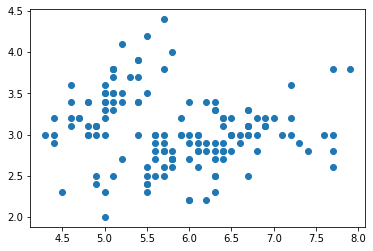

In [16]:
import matplotlib.pyplot as plt 
#split data into attributes and target/label
iris_attrs = iris.drop(['species','species_tag'], axis=1)
plt.scatter(iris_attrs['sepal_length'], iris_attrs['sepal_width'])

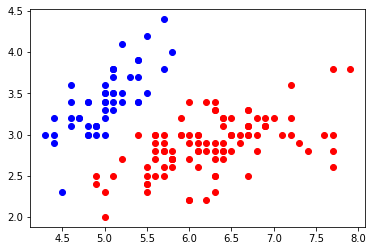

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import mixture

# create GMM
gmm = mixture.GaussianMixture(n_components=2)

# fit the model on the training data
gmm.fit(iris_attrs)
# make prediction
labels = gmm.predict(iris_attrs)
iris_attrs['labels'] = labels
iris_0 = iris_attrs[iris_attrs['labels']==0]
iris_1 = iris_attrs[iris_attrs['labels']==1]

# get results of clustering by GMM, x: sepal_length y:sepal_width
plt.scatter(iris_0['sepal_length'],iris_0['sepal_width'], color='r')
plt.scatter(iris_1['sepal_length'],iris_1['sepal_width'], color='b')

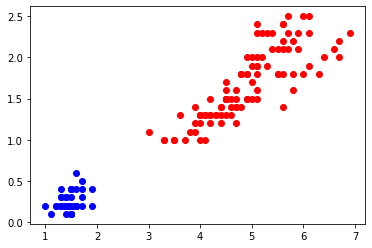

In [29]:
# get results of clustering by GMM, x: petal_length y:petal_width
plt.scatter(iris_0['petal_length'],iris_0['petal_width'], color='r')
plt.scatter(iris_1['petal_length'],iris_1['petal_width'], color='b')